# Quickstart

Let $\mathbf{F}(\mathbf{x}) = \mathbf{H} \mathbf{x}$ for some $\mathbf{H} \succ \mathbf{0}$, $g(\mathbf{x}) = \|\mathbf{x}\|_1$, and $\mathcal{S} = \{\mathbf{x} \in \mathbb{R}^n : \mathbf{A} \mathbf{x} \leq \mathbf{b}\}$, for some $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{b} \in \mathbb{R}^n$. 

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

from monviso import prox_gradient

np.random.seed(2024)

In [2]:
# Create the problem data
n, m = 30, 40
H = np.random.uniform(2, 10, size=(n, n))
A = np.random.uniform(3, 7, size=(m, n))
b = np.random.uniform(45, 50, size=(m,))

# Make H positive definite
H = H @ H.T

# Define F, g, and S
F = lambda x: H @ x
g = lambda x: cp.norm(x, 1)

y = cp.Variable(n)
S = [
    A @ y >= b, 
    y >= 1
]

For didactic purposes, let's create an initial point that does not belong to $\mathcal{S}$. 

In [ ]:
# Initial point
x = np.random.uniform(-5, -4, n)

It is straightforward to verify that $\mathbf{F}(\cdot)$ is strongly monotone with $\mu = \lambda_{\min}(\mathbf{H})$ 
and Lipschitz with $L = \|\mathbf{H}\|_2$. 

In [3]:
# Lipschitz and strong monotonicity constants
mu = np.linalg.eigvals(H).min()
L = np.linalg.norm(H, 2)
step_size = 2*mu / L**2

Solving the VI in can be done using ``monviso`` as follows

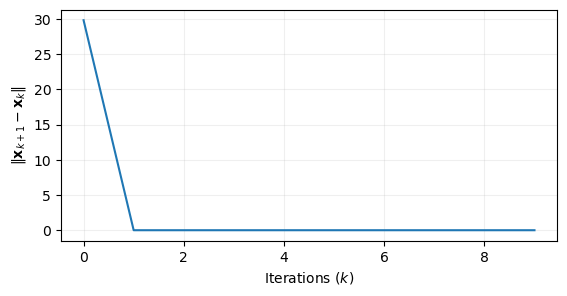

In [4]:
# Define and solve the VI
pg = prox_gradient(F, y, g, S)
num_iterations = 10

residuals = np.zeros(num_iterations)
for k in range(num_iterations):
    new_x = pg(x, step_size)
    residuals[k] = np.linalg.norm(x - new_x)
    x = new_x
    
# Plot the residual
fig, ax = plt.subplots(figsize=(6.4, 3))
ax.plot(residuals)
ax.grid(True, alpha=0.2)
ax.set_xlabel("Iterations ($k$)")
ax.set_ylabel(r"$\|\mathbf{x}_{k+1} - \mathbf{x}_k\|$")

plt.show()